## Import Library

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Collect data dan inisialisasi data

In [ ]:
path_1 = 'gdrive/My Drive/DigitalSkola/Dataset/homecredit_train.csv'

df = pd.read_csv(path_1)

## Cek 5 data terakhir

In [ ]:
## Data Train
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,...,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,...,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,...,0.0855,0.9445,0.0000,0.0000,reg oper account,block of flats,0.7970,Panel,No,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,...,NaN,0.0062,NaN,NaN,NaN,block of flats,0.0086,"Stone, brick",No,0.0,0.0,0.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-5128.0,-410,NaN,1,1,1,1,1,0,Laborers,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,...,NaN,0.0805,NaN,0.0000,NaN,block of flats,0.0718,Panel,No,0.0,0.0,0.0,0.0,-787.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


## Cek Missing Value

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


## Cek Missing Value yang Di atas 30 percent.

In [ ]:
missingvalue_30 = missing_data.loc[missing_data.Percent >= 30.0, :]
print('Total:', len(missingvalue_30))
print(missingvalue_30)

Total: 50
                               Total  Percent
COMMONAREA_MEDI               214865     69.9
COMMONAREA_AVG                214865     69.9
COMMONAREA_MODE               214865     69.9
NONLIVINGAPARTMENTS_MODE      213514     69.4
NONLIVINGAPARTMENTS_MEDI      213514     69.4
NONLIVINGAPARTMENTS_AVG       213514     69.4
FONDKAPREMONT_MODE            210295     68.4
LIVINGAPARTMENTS_MEDI         210199     68.4
LIVINGAPARTMENTS_MODE         210199     68.4
LIVINGAPARTMENTS_AVG          210199     68.4
FLOORSMIN_MEDI                208642     67.8
FLOORSMIN_MODE                208642     67.8
FLOORSMIN_AVG                 208642     67.8
YEARS_BUILD_MEDI              204488     66.5
YEARS_BUILD_AVG               204488     66.5
YEARS_BUILD_MODE              204488     66.5
OWN_CAR_AGE                   202929     66.0
LANDAREA_MODE                 182590     59.4
LANDAREA_AVG                  182590     59.4
LANDAREA_MEDI                 182590     59.4
BASEMENTAREA_MEDI       

## Cek Missing Value yang di bawah 30 percent.

In [ ]:
missingvalue_under30 = missing_data.loc[missing_data.Percent <= 30.0, :]
print('Total:', len(missingvalue_under30))
print(missingvalue_under30)

Total: 72
                             Total  Percent
EXT_SOURCE_3                 60965     19.8
AMT_REQ_CREDIT_BUREAU_QRT    41519     13.5
AMT_REQ_CREDIT_BUREAU_YEAR   41519     13.5
AMT_REQ_CREDIT_BUREAU_WEEK   41519     13.5
AMT_REQ_CREDIT_BUREAU_MON    41519     13.5
...                            ...      ...
REG_CITY_NOT_LIVE_CITY           0      0.0
LIVE_REGION_NOT_WORK_REGION      0      0.0
REG_REGION_NOT_WORK_REGION       0      0.0
HOUR_APPR_PROCESS_START          0      0.0
SK_ID_CURR                       0      0.0

[72 rows x 2 columns]


## Menghapus columns yang 30% data kosong

In [ ]:
droptrain_datamiss = df.drop(labels= ['COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_MEDI'
                                            ,'NONLIVINGAPARTMENTS_AVG','FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG'
                                            ,'FLOORSMIN_MEDI','FLOORSMIN_MODE','FLOORSMIN_AVG','YEARS_BUILD_MEDI','YEARS_BUILD_AVG','YEARS_BUILD_MODE'
                                            ,'OWN_CAR_AGE','LANDAREA_MODE','LANDAREA_AVG','LANDAREA_MEDI','BASEMENTAREA_MEDI','BASEMENTAREA_AVG','BASEMENTAREA_MODE'
                                            ,'EXT_SOURCE_1','NONLIVINGAREA_MEDI','NONLIVINGAREA_AVG','NONLIVINGAREA_MODE','ELEVATORS_MODE','ELEVATORS_AVG'
                                            ,'ELEVATORS_MEDI','WALLSMATERIAL_MODE','APARTMENTS_MODE','APARTMENTS_AVG','APARTMENTS_MEDI','ENTRANCES_MEDI'
                                            ,'ENTRANCES_MODE','ENTRANCES_AVG','LIVINGAREA_MEDI','LIVINGAREA_MODE','LIVINGAREA_AVG','HOUSETYPE_MODE'
                                            ,'FLOORSMAX_MODE','FLOORSMAX_MEDI','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_AVG'
                                            ,'YEARS_BEGINEXPLUATATION_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE','OCCUPATION_TYPE'
                                            ,'ORGANIZATION_TYPE'], axis=1, inplace = True)

## Cek Total data yang ada

In [ ]:
## data train
df.shape

(307511, 71)

## Feature Engineering

In [ ]:
## Merubah menjadi nilai absolute Karena Jelas bahwa semakin tua klien,
## semakin tinggi kemungkinan pengembalian (tentu saja hingga batas tertentu). 
## Tetapi untuk beberapa alasan, usia diindikasikan pada hari-hari negatif sebelum pinjaman dikeluarkan,
## oleh karena itu, usia tersebut berkorelasi positif dengan tidak adanya pembayaran kembali (yang terlihat agak aneh).
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])

In [ ]:
## Cek Columns Category
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE            2
CODE_GENDER                   3
FLAG_OWN_CAR                  2
FLAG_OWN_REALTY               2
NAME_TYPE_SUITE               7
NAME_INCOME_TYPE              8
NAME_EDUCATION_TYPE           5
NAME_FAMILY_STATUS            6
NAME_HOUSING_TYPE             6
WEEKDAY_APPR_PROCESS_START    7
dtype: int64

In [ ]:
## Hapus Target
train_drop = df.drop(labels=['SK_ID_CURR','TARGET'], axis=1)

In [ ]:
## Pemisahan colum Category dan Numeric
cat_features = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE'
                ,'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'
                ,'WEEKDAY_APPR_PROCESS_START']
num_features = [i for i in train_drop.columns if i not in cat_features]
features = cat_features + num_features

In [ ]:
## Untuk melengkapi nilai kosong dengan nilai rata2 dan normalisasi.
num_transformer = Pipeline(steps = [('impeter', SimpleImputer(strategy='mean'))
                                   ,('scaler', StandardScaler())])

In [ ]:
## Untuk melengkapi nilai kosong dengan nilai konstan dan merubah huruf dengan OneHotEncoding.
cat_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy='constant', fill_value='missing'))
                                   ,('onehot', OneHotEncoder(handle_unknown='ignore'))
                                   ])

In [ ]:
## Melakukan ColumnTransformer untuk membentuk fitur tunggal
preprocessor = ColumnTransformer(transformers = [('num', num_transformer, num_features)
                                                ,('cat', cat_transformer, cat_features)])

## Train test split

In [ ]:
## Melakukan traning dan membagi data menjadi label dan tanget.
preprocessor.fit(df[features])
X = preprocessor.transform(df[features])
y = df.TARGET.values

In [ ]:
## Melakukan train test split dengan membagi data test 30.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X, y, test_size = 0.30,random_state = 100)

In [ ]:
## Cek data
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (215257, 108)
X_test shape: (92254, 108)
y_train shape: (215257,)
y_test shape: (92254,)


## Imbalanced Dataset

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_sm,y_train_sm = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Menggunakan Model DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth=3, min_samples_leaf= 5)
clf.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
## Accuracy Score Test
from sklearn.metrics import accuracy_score
y_test_sm_pred = clf.predict(X_test)
accuracy_score(y_test, y_test_sm_pred)

0.735577861122553

In [ ]:
## Accuracy Score Train
y_train_sm_pred = clf.predict(X_train_sm)
accuracy_score(y_train_sm, y_train_sm_pred)

0.7003809177389451

In [ ]:
## Cross validasi Score
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf, X_train_sm, y_train_sm, cv=3))

[0.68139313 0.71050757 0.7092269 ]


In [ ]:
## Cross validasi Predict
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(clf, X_train_sm, y_train_sm, cv=3)
confusion_matrix(y_train_sm, predictions)

array([[150616,  47327],
       [ 71290, 126653]])

In [ ]:
## Score Precision dan Recall
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y_train_sm, predictions))
print("Recall:",recall_score(y_train_sm, predictions))

Precision: 0.7279744798252673
Recall: 0.6398458141990371


In [ ]:
## mendapatkan kemungkinan prediksi
y_scores_clf = clf.predict_proba(X_train_sm)
y_scores_clf = y_scores_clf[:,1]

In [ ]:
## cek ROC_AUC Score
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train_sm, y_scores_clf)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.7533371556010562


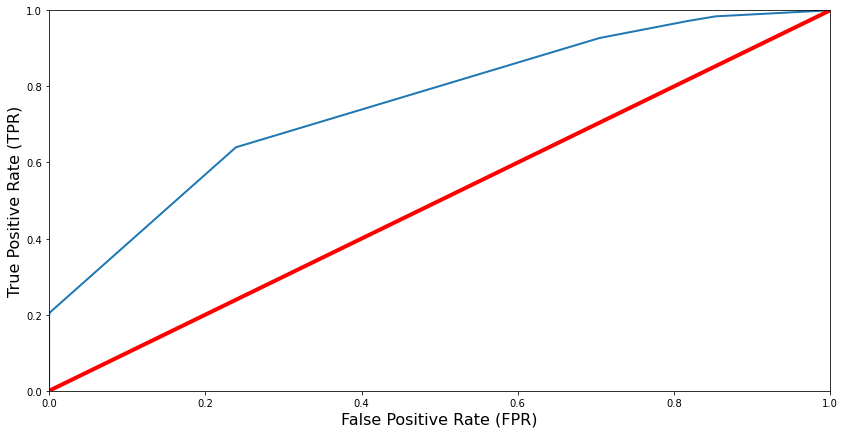

In [ ]:
## ROC AUC Curve
from sklearn.metrics import roc_curve
# menghitung rasio positif benar dan rasio positif salah
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_sm, y_scores_clf)
# Membuat Plotting
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

## Menggunakan Model Random Forest

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=100)
rf.fit(X_train_sm,y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [ ]:
## Accuracy Score Test
y_test_sm_pred = rf.predict(X_test)
accuracy_score(y_test, y_test_sm_pred)

0.9185509571400698

In [ ]:
## Accuracy Score Train
y_train_sm_pred = rf.predict(X_train_sm)
accuracy_score(y_train_sm, y_train_sm_pred)

0.9999949480405975

In [ ]:
## Cross validasi Score
print(cross_val_score(rf, X_train_sm, y_train_sm, cv=3))

[0.86800746 0.99712796 0.99749928]


In [ ]:
## Cross validasi Predick
predictions = cross_val_predict(rf, X_train_sm, y_train_sm, cv=3)
confusion_matrix(y_train_sm, predictions)

array([[282088,    598],
       [ 25487, 257199]])

In [ ]:
## Score Precision dan Recall
print("Precision:", precision_score(y_train_sm, predictions))
print("Recall:",recall_score(y_train_sm, predictions))

Precision: 0.7279744798252673
Recall: 0.6398458141990371


In [ ]:
## mendapatkan kemungkinan prediksi
y_scores_rf = rf.predict_proba(X_train_sm)
y_scores_rf = y_scores_rf[:,1]

In [ ]:
## cek ROC_AUC Score
r_a_score = roc_auc_score(y_train_sm, y_scores_rf)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 1.0


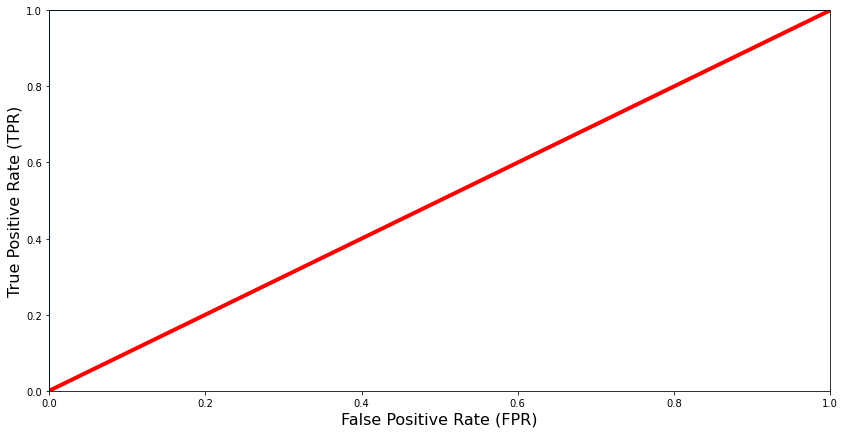

In [ ]:
## ROC AUC Curve
from sklearn.metrics import roc_curve
# menghitung rasio positif benar dan rasio positif salah
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_sm, y_scores_rf)
# Membuat Plotting
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

## Menggunakan model Logistik Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.001, solver='liblinear', random_state=100)
lr.fit(X_train_sm, y_train_sm)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
## Accuracy Score Test
y_test_sm_pred = lr.predict(X_test)
accuracy_score(y_test, y_test_sm_pred)

0.6850109480347736

In [ ]:
## Accuracy Score Train
y_train_sm_pred = lr.predict(X_train)
accuracy_score(y_train, y_train_sm_pred)

0.6870438592008622

In [ ]:
## Cross validasi Score
print(cross_val_score(lr, X_train_sm, y_train_sm, cv=3))

[0.68859975 0.69444234 0.69260848]


In [ ]:
## Cross validasi Predick
predictions = cross_val_predict(lr, X_train_sm, y_train_sm, cv=3)
confusion_matrix(y_train_sm, predictions)

array([[136396,  61547],
       [ 60432, 137511]])

In [ ]:
## Score Precision dan Recall
print("Precision:", precision_score(y_train_sm, predictions))
print("Recall:",recall_score(y_train_sm, predictions))

Precision: 0.6908087090194818
Recall: 0.6946999893908853


In [ ]:
## mendapatkan kemungkinan prediksi
y_scores_lr = lr.predict_proba(X_train_sm)
y_scores_lr = y_scores_lr[:,1]

In [ ]:
## cek ROC_AUC Score
r_a_score = roc_auc_score(y_train_sm, y_scores_lr)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.7579014926045587


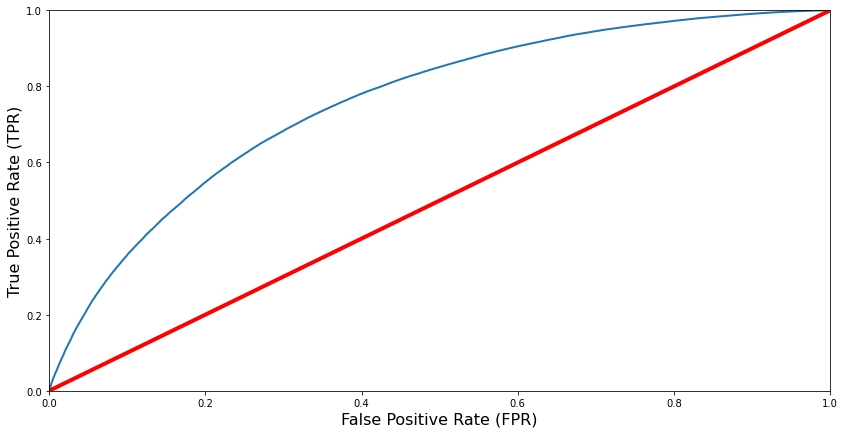

In [ ]:
## ROC AUC Curve
from sklearn.metrics import roc_curve
# menghitung rasio positif benar dan rasio positif salah
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_sm, y_scores_lr)
# Membuat Plotting
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

## Prediksi dengan Model Desicion Tree

In [ ]:
prediction_clf = clf.predict(X_test)

In [ ]:
predik_clf = pd.DataFrame(data= prediction_clf, columns= ['Target'])
predik_clf.head(10)

,Target
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,1
8,0
9,0


## Prediksi dengan model Random Forest

In [ ]:
prediction_rf = rf.predict(X_test)

In [ ]:
predik_rf = pd.DataFrame(data= prediction_rf, columns= ['Target'])
predik_rf.head(10)

,Target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## Prediksi dengan Model Logistik Regression

In [ ]:
prediction_lr = lr.predict(X_test)

In [ ]:
predik_lr = pd.DataFrame(data= prediction_lr, columns= ['Target'])
predik_lr.head(10)

,Target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,1
